# Capstone Project V1.5
## Name: Koh Pee Sim
## Date  : 2024 Aug 7
### Dataset : Turnover_balance HR dataset
#### Ver 1.1 Include stratify option for MLR and KNN and solve SVM hang
#### Ver 1.2 enhance deep learning modelu accuracy by add dropout, epoch, learning_rate
#### Ver 1.3 Remove MLR and deep learning NN model as it is not for classification predict
#### Ver 1.4 convert division and salary to numeric and include in ML model
####              add in smote and cross validateion
#### Ver 1.5 try smote after split train and test


# Import library

In [1]:
# Import the necessary library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression  # note need to import this
from sklearn import metrics #for checking the model accuracy
from sklearn.datasets import make_classification
from sklearn.svm import SVC  # note need to import this
from sklearn.tree import DecisionTreeClassifier  # note need to import this
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
# To ignore the warnings that may appear

import warnings
warnings.filterwarnings("ignore")

#set random seed
np.random.seed(42)

# Read file

In [2]:

# read file from URL
url = "turnover_balance.csv"
df = pd.read_csv(url) # read csv file


In [3]:
# Understand file details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7142 entries, 0 to 7141
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     7142 non-null   float64
 1   last_evaluation        7142 non-null   float64
 2   number_project         7142 non-null   int64  
 3   average_montly_hours   7142 non-null   int64  
 4   time_spend_company     7142 non-null   int64  
 5   Work_accident          7142 non-null   int64  
 6   promotion_last_5years  7142 non-null   int64  
 7   division               7142 non-null   object 
 8   salary                 7142 non-null   object 
 9   left                   7142 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 558.1+ KB


In [4]:
df.describe() # provide statistics value for numberic column

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000
mean,0.552569,0.715819,3.818818,203.366144,3.616074,0.108793,0.016802,0.500000
std,0.265043,0.181120,1.458167,54.195166,1.318875,0.311401,0.128538,0.500035
min,0.090000,0.360000,2.000000,97.000000,2.000000,0.000000,0.000000,0.000000
25%,0.380000,0.540000,2.000000,151.000000,3.000000,0.000000,0.000000,0.000000
50%,0.560000,0.730000,4.000000,205.000000,3.000000,0.000000,0.000000,0.500000
75%,0.780000,0.880000,5.000000,252.000000,4.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.head(5)  # print first 5 records

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary,left
0,0.82,0.68,3,140,2,0,0,sales,low,0
1,0.79,0.67,5,156,2,0,0,product_mng,low,0
2,0.73,0.95,3,149,2,0,0,support,low,0
3,0.92,0.78,3,218,3,0,0,technical,low,0
4,0.69,1.00,5,237,3,0,0,technical,high,0


In [6]:
df.tail(5) # print last 5 records

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary,left
7137,0.11,0.89,6,301,4,0,0,sales,medium,1
7138,0.77,0.87,4,242,6,0,0,sales,low,1
7139,0.79,1.00,4,229,5,1,0,management,medium,1
7140,0.88,0.97,4,255,5,1,0,IT,low,1
7141,0.37,0.47,2,148,3,0,0,hr,low,1


In [7]:
# identify factor item in the file with value

columns_with_few_distinct_values = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Get the distinct values in the column
    distinct_values = df[column].unique()
    
    # Check if the number of distinct values is 10 or less
    if len(distinct_values) <= 10:
        # Store the column name and its distinct values in the dictionary
        columns_with_few_distinct_values[column] = distinct_values

# Print the results
print("Columns with 10 or fewer distinct values:")
for column, values in columns_with_few_distinct_values.items():
    print(f"{column}: {len(values)} distinct values -> {values}")

Columns with 10 or fewer distinct values:
number_project: 6 distinct values -> [3 5 4 2 6 7]
time_spend_company: 8 distinct values -> [ 2  3  5  4 10  6  8  7]
Work_accident: 2 distinct values -> [0 1]
promotion_last_5years: 2 distinct values -> [0 1]
division: 10 distinct values -> ['sales' 'product_mng' 'support' 'technical' 'hr' 'marketing' 'IT' 'RandD'
 'accounting' 'management']
salary: 3 distinct values -> ['low' 'high' 'medium']
left: 2 distinct values -> [0 1]


## There are 7142 records with 10 columns
## out of the ten fields, 7 fields have dintinct values
### number_project has value 2 to 7
### time_spend_company has value 2 to 10
### promotion_last_5years has value 0 or 1
### Work_accident has value 0 or 1
### promotion_last_5years has value 0 or 1
### division has value 'sales' 'product_mng' 'support' 'technical' 'hr' 'marketing' 'IT' 'RandD' 'accounting' 'management'
### salary has value 'low' 'high' 'medium'
### left has value 0 or 1

# Data Cleaning

In [8]:
# check for duplicate
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate records: {duplicate_count}")

# there are 1732 dukplicate records

Number of duplicate records: 1732


In [9]:
# After concult HR personal, Confirm they are duplicate. Remove duplicate rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5410 entries, 0 to 7140
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     5410 non-null   float64
 1   last_evaluation        5410 non-null   float64
 2   number_project         5410 non-null   int64  
 3   average_montly_hours   5410 non-null   int64  
 4   time_spend_company     5410 non-null   int64  
 5   Work_accident          5410 non-null   int64  
 6   promotion_last_5years  5410 non-null   int64  
 7   division               5410 non-null   object 
 8   salary                 5410 non-null   object 
 9   left                   5410 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 464.9+ KB


In [10]:
# Check if any column has null values
has_null_in_any_column = df.isnull().any()

# Print columns with null values
columns_with_null = has_null_in_any_column[has_null_in_any_column].index.tolist()

if columns_with_null:
    print("The following columns have null values:", columns_with_null)
else:
    print("No columns have null values.")

No columns have null values.


In [11]:
# Get the total number of 1 and 0 in the 'left' column
value_counts = df['left'].value_counts()

# Print the counts
print(value_counts)

left
0    3419
1    1991
Name: count, dtype: int64


# Data Wrangling

In [12]:
# Create data frame for resigned and current staff
df_0 = df[df['left'] == 0]
df_1 = df[df['left'] == 1]

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 3571 to 7140
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     1991 non-null   float64
 1   last_evaluation        1991 non-null   float64
 2   number_project         1991 non-null   int64  
 3   average_montly_hours   1991 non-null   int64  
 4   time_spend_company     1991 non-null   int64  
 5   Work_accident          1991 non-null   int64  
 6   promotion_last_5years  1991 non-null   int64  
 7   division               1991 non-null   object 
 8   salary                 1991 non-null   object 
 9   left                   1991 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 171.1+ KB


## there are 5410 records after remove the duplicate rows
## no columns has null value.
## there are 3419 current staff and 1991 resign staff records. the dataset is imbalance as far as resignation records is concerned.

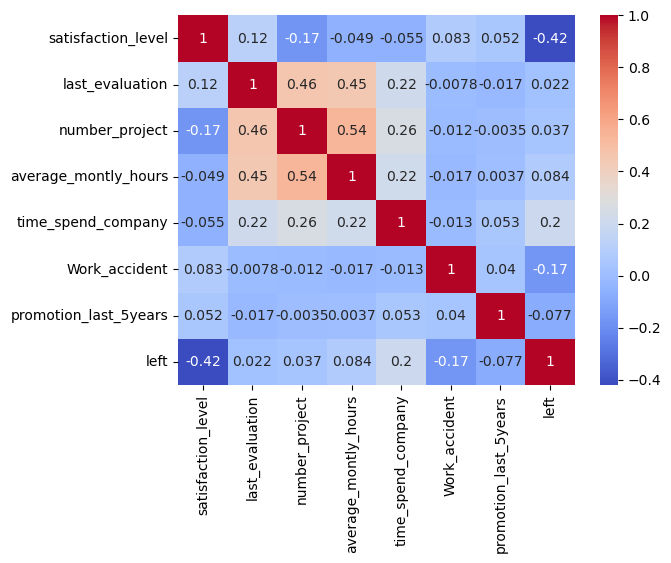

In [14]:
# understand the correlation between two numberic variables

correl = df.corr(numeric_only = True)
sns.heatmap(correl, annot = True, cmap = "coolwarm")
plt.show()

# From the heatmap, there is more correlation between last_evaluation,number_project and average_,onthly_hours
 

# Data Visualisation : plot graphs and get insight

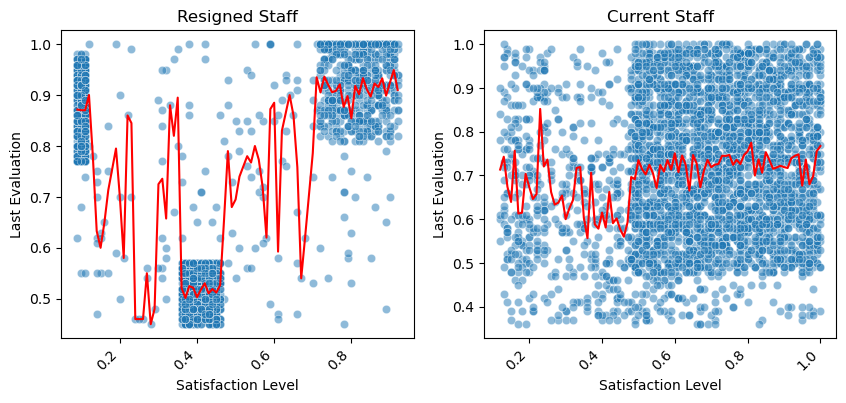

In [15]:
# Scatter plot
fig = plt.figure(figsize=(10,4))

# Subplot 1
plt.subplot(1,2,1)
x_column = 'satisfaction_level'
y_column = 'last_evaluation'

sns.scatterplot(x=x_column, y=y_column, data=df_1, alpha=0.5)
# Smooth line plot
sns.lineplot(x='satisfaction_level', y='last_evaluation', data=df_1, ci=None, color='red')

plt.xticks(rotation=45, ha='right')  # rotate x label 45 degree to the right
plt.title('Resigned Staff')
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")

# Subplot 2
plt.subplot(1,2,2)
x_column = 'satisfaction_level'
y_column = 'last_evaluation'

sns.scatterplot(x=x_column, y=y_column, data=df_0, alpha=0.5)
# Smooth line plot
sns.lineplot(x='satisfaction_level', y='last_evaluation', data=df_0, ci=None, color='red')

plt.xticks(rotation=45, ha='right')  # rotate x label 45 degree to the right
plt.title('Current Staff')
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.show()

# Insight : The resign staff has three clusters. They are either not satisfy or they are 
#           satisfy with improvement or fully satisfaction also leaving which is the concern

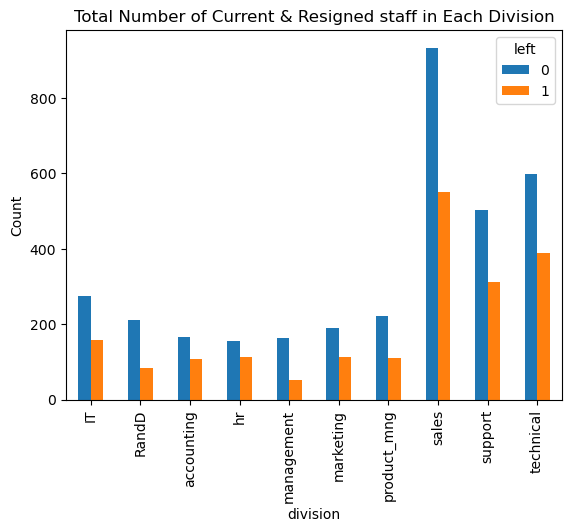

In [16]:

division_left_counts = df.groupby(['division','left']).size().unstack(fill_value=0)
# Plot the bar chart
division_left_counts.plot(kind='bar', stacked=False)
plt.gca().set_title('Total Number of Current & Resigned staff in Each Division')
plt.gca().set_xlabel('division')
plt.gca().set_ylabel('Count')
plt.gca().legend(title='left')
plt.show()

# Insight : The Sales department has the highest number of staff also highest turnover and 
#           follow by technical and support group. This could be a concern as Sales related to income
#           and technical and support will affect the operation.

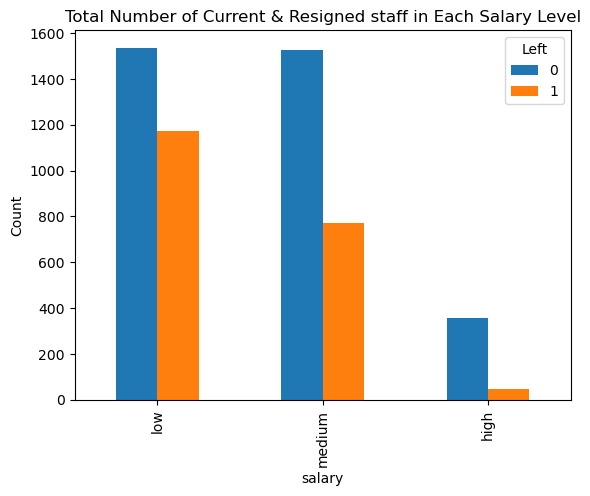

In [17]:
df['salary'] = pd.Categorical(df['salary'], categories=['low', 'medium', 'high'], ordered=True)
salary_left_counts = df.groupby(['salary','left']).size().unstack(fill_value=0)
# Plot the bar chart
salary_left_counts.plot(kind='bar', stacked=False)
plt.gca().set_title('Total Number of Current & Resigned staff in Each Salary Level')
plt.gca().set_xlabel('salary')
plt.gca().set_ylabel('Count')
plt.gca().legend(title='Left')
plt.show()

# Insight : More resignation in low salary group and lesser resignation in the other two 
#           salary group

<Figure size 1000x800 with 0 Axes>

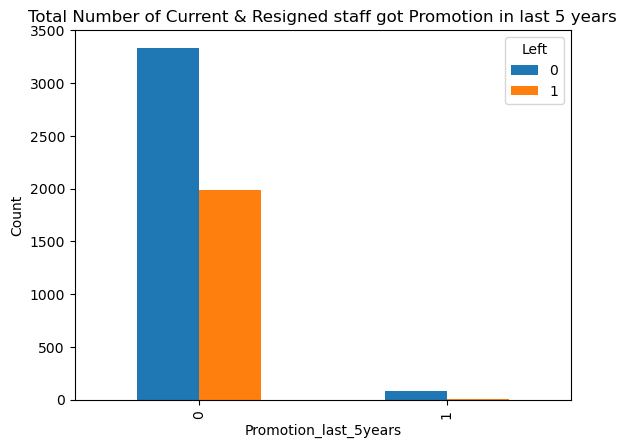

In [18]:
# promotion_last_5years
fig = plt.figure(figsize=(10,8))
promotion_last_5years_left_counts = df.groupby(['promotion_last_5years','left']).size().unstack(fill_value=0)
# Plot the bar chart
promotion_last_5years_left_counts.plot(kind='bar', stacked=False)
plt.gca().set_title('Total Number of Current & Resigned staff got Promotion in last 5 years')
plt.gca().set_xlabel('Promotion_last_5years')
plt.gca().set_ylabel('Count')
plt.gca().legend(title='Left')
plt.show()

# Insight : Most people are not promoted in last five years so HR could look into promotion 
#           criteria.

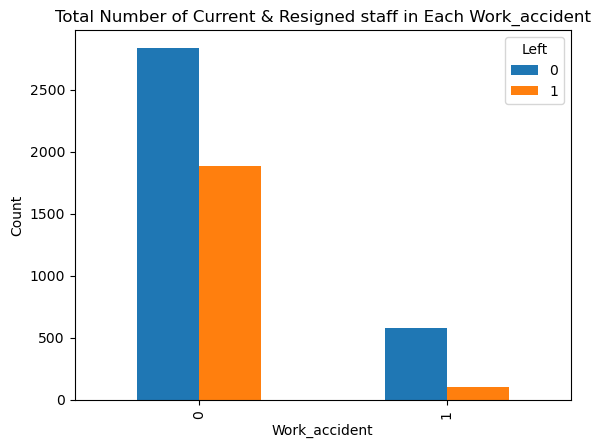

In [19]:
# work_accident

work_accident_left_counts = df.groupby(['Work_accident','left']).size().unstack(fill_value=0)
# Plot the bar chart
work_accident_left_counts.plot(kind='bar', stacked=False)
plt.gca().set_title('Total Number of Current & Resigned staff in Each Work_accident')
plt.gca().set_xlabel('Work_accident')
plt.gca().set_ylabel('Count')
plt.gca().legend(title='Left')
plt.show()

# Insight : The work accident rate in the company is low.

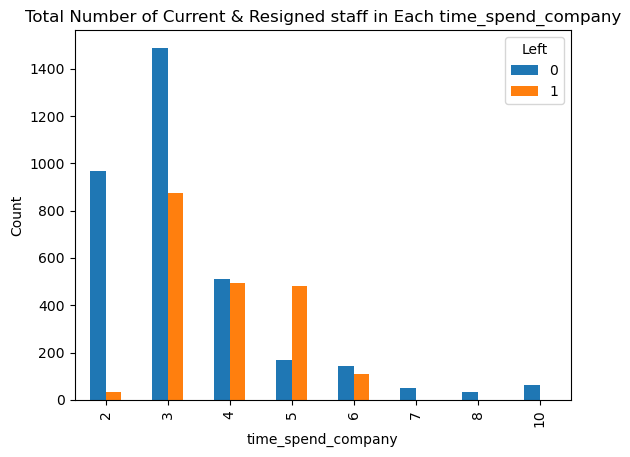

In [20]:
# time_spend_company

time_spend_company_left_counts = df.groupby(['time_spend_company','left']).size().unstack(fill_value=0)
# Plot the bar chart
time_spend_company_left_counts.plot(kind='bar', stacked=False)
plt.gca().set_title('Total Number of Current & Resigned staff in Each time_spend_company')
plt.gca().set_xlabel('time_spend_company')
plt.gca().set_ylabel('Count')
plt.gca().legend(title='Left')
plt.show()

# Insight : Most of resign staff left the company after working for three years. 

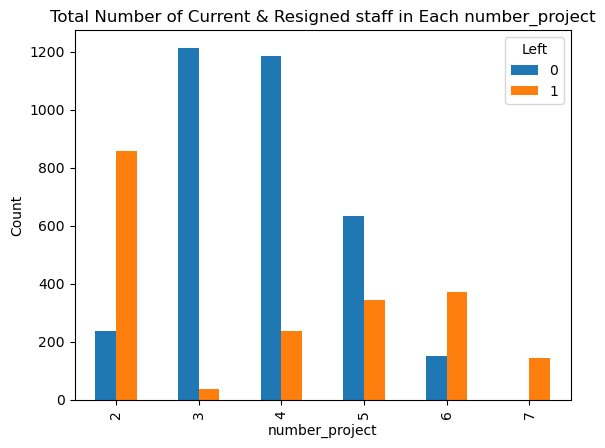

In [21]:
# number_project

number_project_left_counts = df.groupby(['number_project','left']).size().unstack(fill_value=0)
# Plot the bar chart
number_project_left_counts.plot(kind='bar', stacked=False)
plt.gca().set_title('Total Number of Current & Resigned staff in Each number_project')
plt.gca().set_xlabel('number_project')
plt.gca().set_ylabel('Count')
plt.gca().legend(title='Left')
plt.show()

# Insight : Most of resign staff are having work on two projects only or more than 5 projects.
#           This might indicate staff left due to litter work exposure or gain enough work 
#           experience.

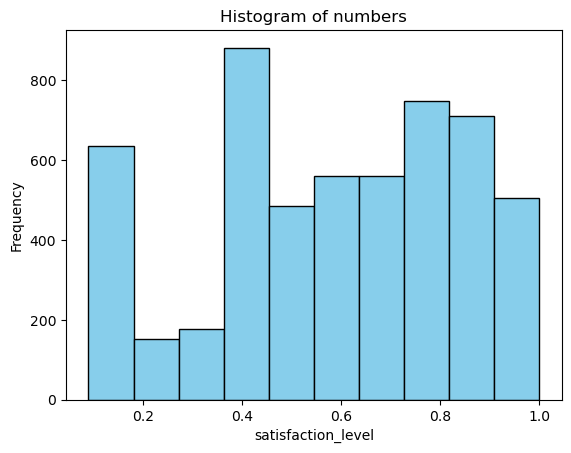

In [22]:
# Histogram chart

x_column = 'satisfaction_level'  # a numberic column

# The histogram method plt.hist. Dox: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(df['satisfaction_level'], bins=10, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of satisfaction_level')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.title('Histogram of numbers')
plt.show()


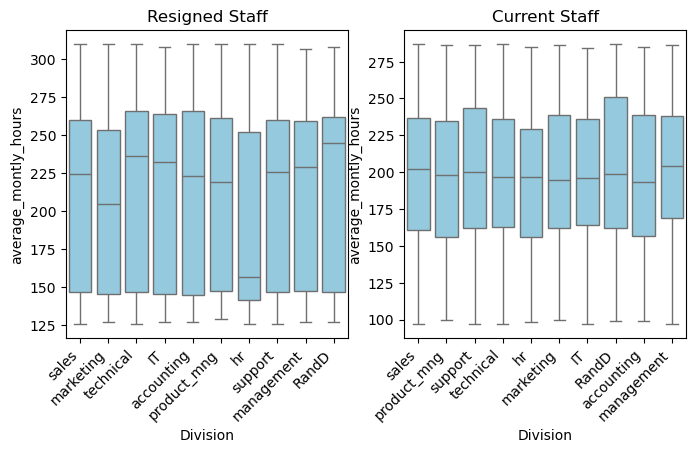

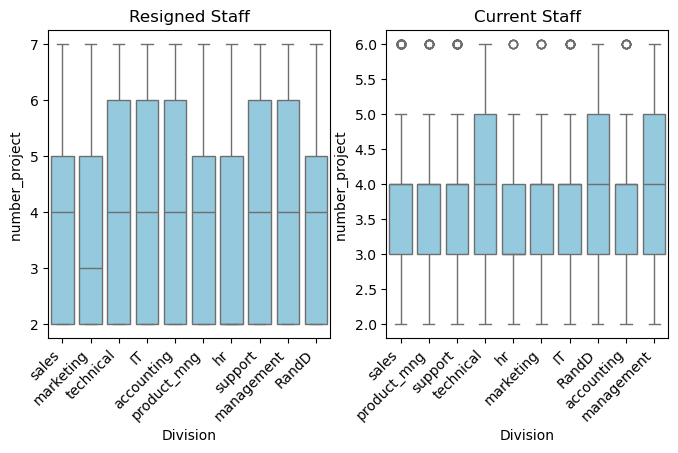

In [23]:
# Boxplot
fig = plt.figure(figsize=(8,4))

# Subplot 1
plt.subplot(1,2,1)

sns.boxplot(x='division', y='average_montly_hours', data=df_1,color='skyblue')

plt.xticks(rotation=45, ha='right')  # rotate x label 45 degree to the right
plt.title('Resigned Staff')
plt.xlabel('Division')
plt.ylabel('average_montly_hours')

# Subplot 2
plt.subplot(1,2,2)
sns.boxplot(x='division', y='average_montly_hours', data=df_0,color='skyblue')

plt.xticks(rotation=45, ha='right')  # rotate x label 45 degree to the right
plt.title('Current Staff')
plt.xlabel('Division')
plt.ylabel('average_montly_hours')

# Show the plot
plt.show()# Boxplot
fig = plt.figure(figsize=(8,4))

# Subplot 1
plt.subplot(1,2,1)

sns.boxplot(x='division', y='number_project', data=df_1,color='skyblue')

plt.xticks(rotation=45, ha='right')  # rotate x label 45 degree to the right
plt.title('Resigned Staff')
plt.xlabel('Division')
plt.ylabel('number_project ')

# Subplot 2
plt.subplot(1,2,2)
sns.boxplot(x='division', y='number_project', data=df_0,color='skyblue')

plt.xticks(rotation=45, ha='right')  # rotate x label 45 degree to the right
plt.title('Current Staff')
plt.xlabel('Division')
plt.ylabel('number_project ')

# Show the plot
plt.show()
#These shows the current staff in every department put in about the same amount of time in work a month.
# Where else in resigned staff, HR department the average is the lowest and R&D is the highest.
# markeying and HR also has the lowest number of projects worked.


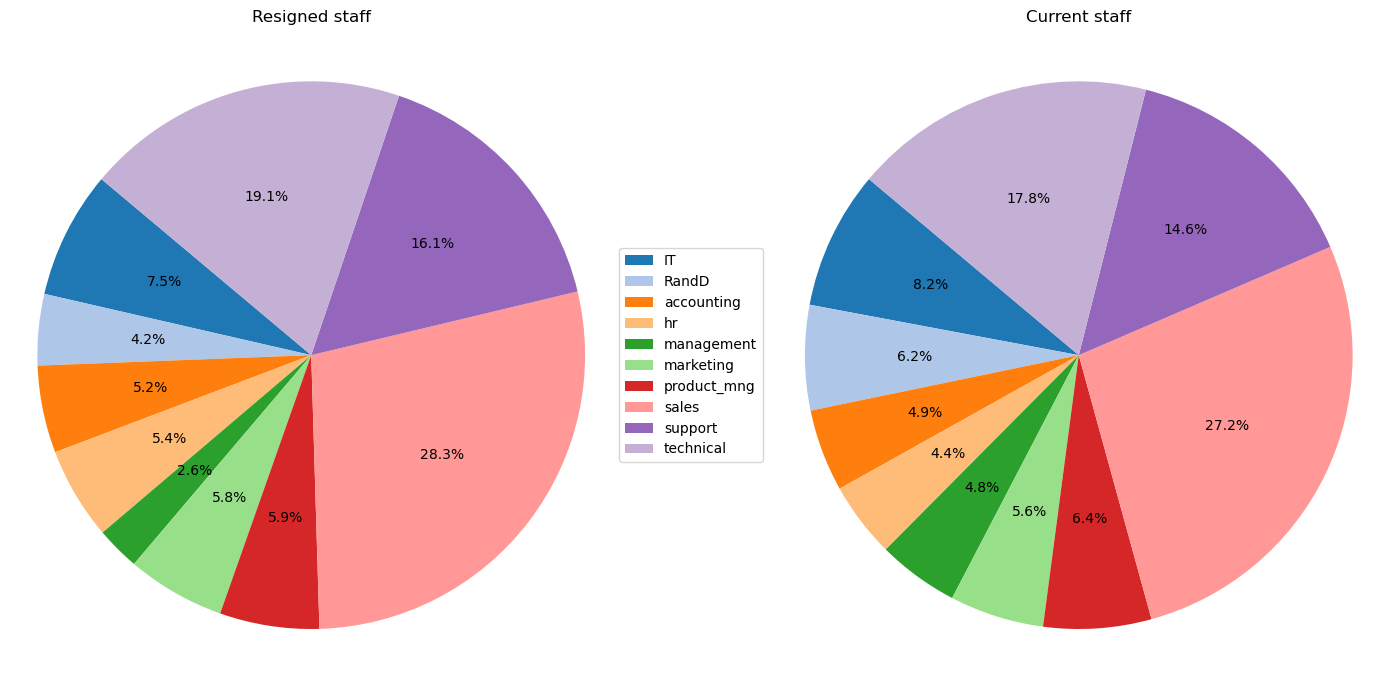

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Pie chart
fig = plt.figure(figsize=(14, 7))

# Subplot 1
plt.subplot(1, 2, 1)
total_col2_by_fcol1 = df_1.groupby('division')['satisfaction_level'].sum()

# Create a pie chart with percentages inside
colors = plt.get_cmap('tab20')(range(len(total_col2_by_fcol1)))
patches, texts, autotexts = plt.pie(total_col2_by_fcol1, 
                                    autopct='%1.1f%%', 
                                    startangle=140, 
                                    colors=colors)

# Add a title
plt.title('Resigned staff')

# Equal aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')

# Add legend to the right of the pie chart
plt.legend(patches, total_col2_by_fcol1.index, loc="center left", bbox_to_anchor=(1, 0.5))

# Subplot 2
plt.subplot(1, 2, 2)
total_col2_by_fcol1 = df_0.groupby('division')['satisfaction_level'].sum()

# Create a pie chart with percentages inside
colors = plt.get_cmap('tab20')(range(len(total_col2_by_fcol1)))
plt.pie(total_col2_by_fcol1, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)

# Add a title
plt.title('Current staff')

# Equal aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')

# Only add legend to the first subplot
# plt.legend(patches, total_col2_by_fcol1.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
#These show three big group of people are in sales, support and technical departments. This should raise a big concern
# as sales department will affect income and support and technical department will affect operation 
# (might be cost related) These three department will affect the operation of the company. Need to pay attention.



In [25]:
# create a new column more_satisfy
df['more_satisfaction'] = df['satisfaction_level'] - df['last_evaluation']

salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary_n'] = df['salary'].map(salary_mapping)
df['salary_n']=df['salary_n'].astype(int)
division_mapping = {'sales': 1, 'product_mng': 2, 'support': 3, 'technical': 4,'hr':5,
                   'marketing':6, 'IT': 7, 'RandD':8, 'accounting':9, 'management':10}
df['division_n'] = df['division'].map(division_mapping)
df['division_n']=df['division_n'].astype(int)
df['left_n']=df['left']

df = df.drop(['salary', 'division', 'left'], axis=1)
df = df.rename(columns={'left_n': 'left'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5410 entries, 0 to 7140
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     5410 non-null   float64
 1   last_evaluation        5410 non-null   float64
 2   number_project         5410 non-null   int64  
 3   average_montly_hours   5410 non-null   int64  
 4   time_spend_company     5410 non-null   int64  
 5   Work_accident          5410 non-null   int64  
 6   promotion_last_5years  5410 non-null   int64  
 7   more_satisfaction      5410 non-null   float64
 8   salary_n               5410 non-null   int32  
 9   division_n             5410 non-null   int32  
 10  left                   5410 non-null   int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 464.9 KB


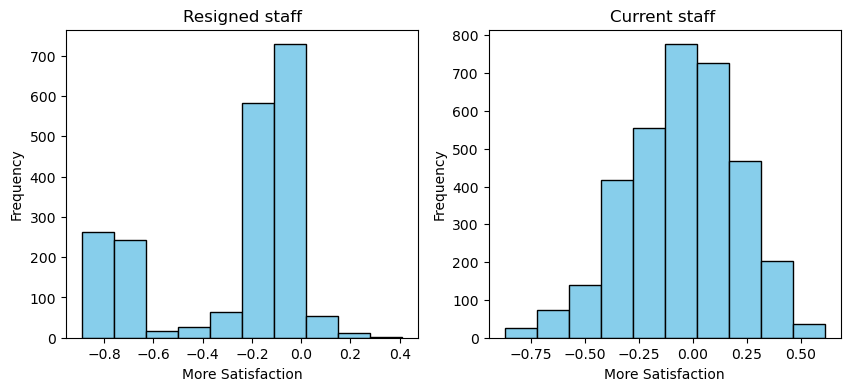

In [27]:
# Create data frame for resigned and current staff
df_0 = df[df['left'] == 0]
df_1 = df[df['left'] == 1]

# Plot above graph for left = 0 and 1 side by side
fig = plt.figure(figsize=(10,4))

# Subplot 1
plt.subplot(1,2,1)
x_column = 'more_satisfaction'  # a numberic column

# The histogram method plt.hist. Dox: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(df_1['more_satisfaction'], bins=10, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Resigned staff')
plt.xlabel('More Satisfaction')
plt.ylabel('Frequency')


# Subplot 2
plt.subplot(1,2,2)
x_column = 'more_satisfaction'  # a numberic column

# The histogram method plt.hist. Dox: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(df_0['more_satisfaction'], bins=10, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Current staff ')
plt.xlabel('More Satisfaction')
plt.ylabel('Frequency')
plt.show()

# Insight : This show no change in satifiaction people still resign and more resign if they 
#           feel lesser satisfaction

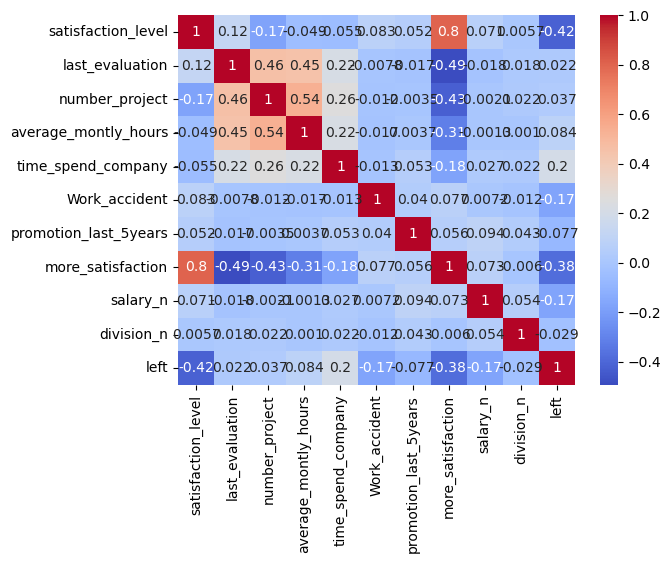

In [28]:
# understand the new correlation between two numberic variables

correl = df.corr(numeric_only = True)
sns.heatmap(correl, annot = True, cmap = "coolwarm")
plt.show()

# From the heatmap, there is more correlation between last_evaluation,number_project and average_,onthly_hours

# KNN model

Best Accuracy: 0.9593345656192237
Best k: 4.0
Number of Features: 5.0


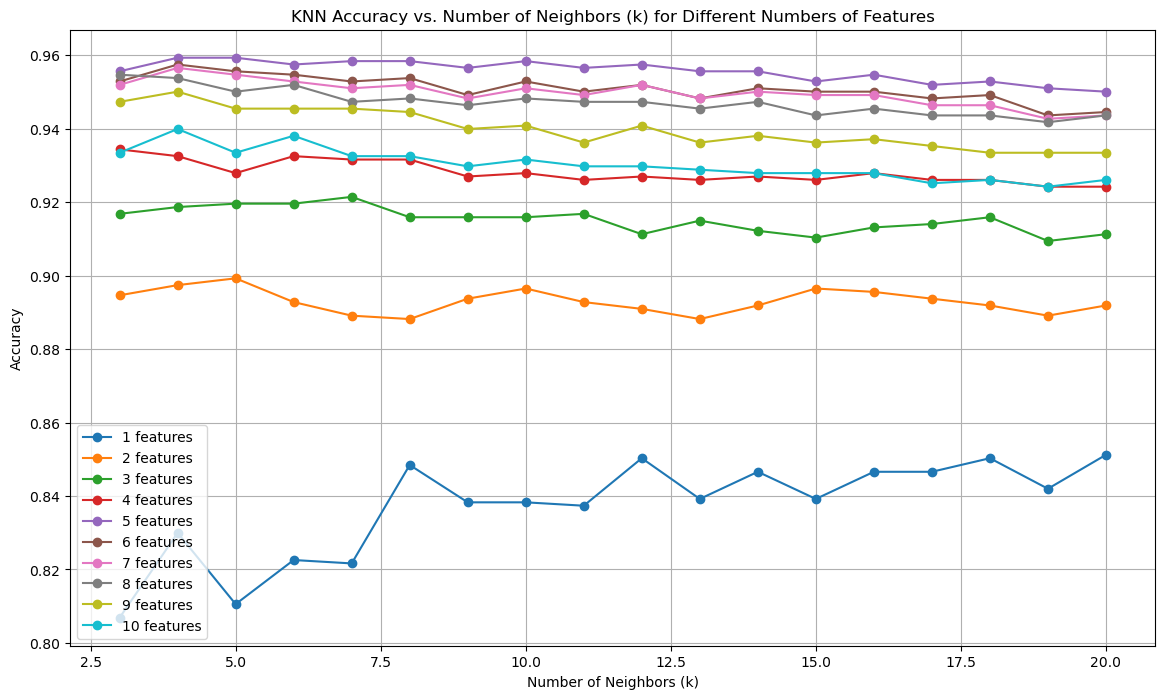

In [29]:
# KNN model
# Separate the features and the target label
X = df.iloc[:, :-1]  # all columns except the last one
y = df.iloc[:, -1]   # the last column

# Select only numeric features
numeric_features = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_features]

# Calculate the correlation between each numeric feature and the target label
correlations = X_numeric.corrwith(y)

# Sort the features based on their correlation with the target label
sorted_features = correlations.abs().sort_values(ascending=False).index

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a list to store the results
results = []

# Outer loop for k from 3 to 20
for k in range(3, 21):
    # Inner loop to train a KNN model using the top N features
    for i in range(1, len(sorted_features) + 1):
        selected_features = sorted_features[:i]
        
        # Train the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled[:, :i], y_train)
        
        # Predict and evaluate the model
        y_pred = knn.predict(X_test_scaled[:, :i])
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        results.append({'k': k, 'num_features': i, 'accuracy': accuracy})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Find the best accuracy and corresponding parameters
best_result = results_df.loc[results_df['accuracy'].idxmax()]
best_k = best_result['k']
best_num_features = best_result['num_features']
best_accuracy = best_result['accuracy']

print(f"Best Accuracy: {best_accuracy}")
print(f"Best k: {best_k}")
print(f"Number of Features: {best_num_features}")

# Plot the results
plt.figure(figsize=(14, 8))
for i in range(1, len(sorted_features) + 1):
    subset = results_df[results_df['num_features'] == i]
    plt.plot(subset['k'], subset['accuracy'], marker='o', label=f'{i} features')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors (k) for Different Numbers of Features')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Create KNN model with k=4 and best 5 features
# Train the KNN model

# indentify the target variable y and the main feature variable x
 
x = df[['satisfaction_level', 'more_satisfaction', 'time_spend_company', 'Work_accident',
       'salary_n']] # Taking only one column as input variable
y = df[["left"]]  # We want to predict sales based on Overall Qual of the house.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42, stratify=y)

knn_model = KNeighborsClassifier(n_neighbors = 4)

knn_model.fit(x_train, y_train)

knn_pred = knn_model.predict(x_test)

knn_accuracy = metrics.accuracy_score(knn_pred, y_test)

print("The accuracy of the KNN model is: ", knn_accuracy*100, "%")


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

The accuracy of the KNN model is:  94.17744916820703 %
Confusion Matrix:
[[656  28]
 [ 35 363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       684
           1       0.93      0.91      0.92       398

    accuracy                           0.94      1082
   macro avg       0.94      0.94      0.94      1082
weighted avg       0.94      0.94      0.94      1082



In [31]:

sorted_features

Index(['satisfaction_level', 'more_satisfaction', 'time_spend_company',
       'Work_accident', 'salary_n', 'average_montly_hours',
       'promotion_last_5years', 'number_project', 'division_n',
       'last_evaluation'],
      dtype='object')

In [32]:
# Add in smote and cross validation for the above knn model

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# indentify the target variable y and the main feature variable x
 
x = df[['satisfaction_level', 'more_satisfaction', 'time_spend_company', 'Work_accident',
       'salary_n']] # Taking only one column as input variable
y = df[["left"]]  # We want to predict sales based on Overall Qual of the house.

# Handle imbalanced data using SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Perform cross-validation
scores = cross_val_score(knn, x_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Fit the model on the entire training set
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.94606947 0.94241316 0.93967093 0.92961609 0.92961609]
Mean cross-validation score: 0.9374771480804387
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       690
           1       0.96      0.94      0.95       678

    accuracy                           0.95      1368
   macro avg       0.95      0.95      0.95      1368
weighted avg       0.95      0.95      0.95      1368

Confusion Matrix:
[[665  25]
 [ 38 640]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       690
           1       0.96      0.94      0.95       678

    accuracy                           0.95      1368
   macro avg       0.95      0.95      0.95      1368
weighted avg       0.95      0.95      0.95      1368



In [33]:
# Add in smote and cross validation for the above knn model

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# indentify the target variable y and the main feature variable x
 
x = df[['satisfaction_level', 'more_satisfaction', 'time_spend_company', 'Work_accident',
       'salary_n']] # Taking only one column as input variable
y = df[["left"]]  # We want to predict sales based on Overall Qual of the house.


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,  stratify=y)


# Handle imbalanced data using SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Perform cross-validation
scores = cross_val_score(knn, x_res, y_res, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Fit the model on the entire training set
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.94698355 0.94241316 0.94058501 0.95155393 0.96252285]
Mean cross-validation score: 0.9488117001828155
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       684
           1       0.93      0.91      0.92       398

    accuracy                           0.94      1082
   macro avg       0.94      0.94      0.94      1082
weighted avg       0.94      0.94      0.94      1082

Confusion Matrix:
[[656  28]
 [ 35 363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       684
           1       0.93      0.91      0.92       398

    accuracy                           0.94      1082
   macro avg       0.94      0.94      0.94      1082
weighted avg       0.94      0.94      0.94      1082



# Support Vector Machines

In [34]:
# indentify the target variable y and the main feature variable x
 
x = df.drop(['left'], axis = 1) # drop yarget Variables and other unwanted variables 
y = df[['left']] # Output # output

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,  stratify=y)

In [35]:
# Create an instance of the SVM classifier
svm = SVC(kernel='linear', random_state=42)

In [36]:
# Train the SVM classifier
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
# Predict the labels of the test set
y_pred = svm.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[547 137]
 [119 279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       684
           1       0.67      0.70      0.69       398

    accuracy                           0.76      1082
   macro avg       0.75      0.75      0.75      1082
weighted avg       0.77      0.76      0.76      1082



# Decision Tree Classifier

In [38]:
x = df.drop(['left'], axis = 1) # drop yarget Variables and other unwanted variables 
y = df[['left']] # Output # output
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,  stratify=y)

# Create an instance of the decision tree classifier
tree= DecisionTreeClassifier()

In [39]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
treePrediction=tree.predict(x_test)

treeAccuracy = metrics.accuracy_score(treePrediction,y_test)

print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

The accuracy of Decision Tree model is: 93.99260628465804 %
Confusion Matrix:
[[417 267]
 [249 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       684
           1       0.36      0.37      0.37       398

    accuracy                           0.52      1082
   macro avg       0.49      0.49      0.49      1082
weighted avg       0.53      0.52      0.53      1082



# Prediction

In [51]:
# Prediction 1: Potential Resign from New Staff
import pandas as pd

# Define the column names
columns = ['satisfaction_level', 'more_satisfaction', 'time_spend_company', 'Work_accident',
       'salary_n']

# Define the data for the single row
data = [[0.6,0,4,0,2]]

# Create the DataFrame
x = pd.DataFrame(data, columns=columns)
knn_pred = knn_model.predict(x)

total_ones = np.sum(knn_pred)
total_zeros = knn_pred.size - total_ones

print(f"Total 1s: {total_ones}")
print(f"Total 0s: {total_zeros}")



# he is likely to resign.


Total 1s: 0
Total 0s: 1


In [42]:
# Prediction 2: Potential Resignation from some Existing Staff
filtered_df = df_0[(df_0['satisfaction_level'] < 0.4) & (df_0['average_montly_hours'] < 150)]
x = filtered_df[['satisfaction_level', 'more_satisfaction', 'time_spend_company', 'Work_accident',
       'salary_n']] # Taking only one column as input variable
knn_pred = knn_model.predict(x)

total_ones = np.sum(knn_pred)
total_zeros = knn_pred.size - total_ones

print(f"Total 1s: {total_ones}")
print(f"Total 0s: {total_zeros}")

# there are 8 likely to resign in near future out of these 81 person.

Total 1s: 8
Total 0s: 81


In [48]:
from collections import Counter
count = Counter(knn_pred)

# Count of 0s and 1s
count_0 = count[0]
count_1 = count[1]
print(count)
print(f"Number of 0s: {count_0}")
print(f"Number of 1s: {count_1}")

Counter({1: 1816, 0: 175})
Number of 0s: 175
Number of 1s: 1816


In [43]:
# Prediction 3: Potential Resignation from All Current Staff 
x = df_0[['satisfaction_level', 'more_satisfaction', 'time_spend_company', 'Work_accident',
       'salary_n']] # Taking only one column as input variable
knn_pred = knn_model.predict(x)

total_ones = np.sum(knn_pred)
total_zeros = knn_pred.size - total_ones

print(f"Total 1s: {total_ones}")
print(f"Total 0s: {total_zeros}")

# there are 70 likely to resign in near future

Total 1s: 72
Total 0s: 3347


In [44]:
# Prediction 4:  Potential rejoin in from All Resigned Staff
x = df_1[['satisfaction_level', 'more_satisfaction', 'time_spend_company', 'Work_accident',
       'salary_n']] # Taking only one column as input variable
knn_pred = knn_model.predict(x)

total_ones = np.sum(knn_pred)
total_zeros = knn_pred.size - total_ones

print(f"Total 1s: {total_ones}")
print(f"Total 0s: {total_zeros}")

# there are 173 staff is good to consider reemploy back.

Total 1s: 1816
Total 0s: 175
